<a href="https://colab.research.google.com/github/annisaeka123/Machine_Learning-Semester5/blob/main/JS07/Tugas_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas 1: Multiple Linear Regression

1.   Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.



Shape: (1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Descriptive stats:
                 age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        N

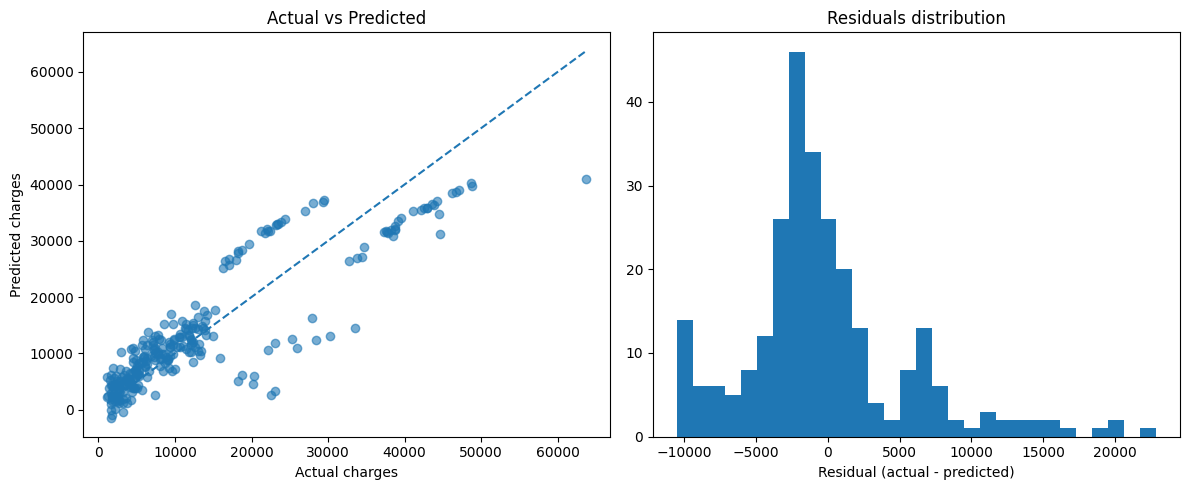


Sample actual vs predicted (first 10):
           actual     predicted     residual
764    9095.06825   8969.550274   125.517976
887    5272.17580   7068.747443 -1796.571643
890   29330.98315  36858.410912 -7527.427762
1293   9301.89355   9454.678501  -152.784951
259   33750.29180  26973.173457  6777.118343
1312   4536.25900  10864.113164 -6327.854164
899    2117.33885    170.280841  1947.058009
752   14210.53595  16903.450287 -2692.914337
1286   3732.62510   1092.430936  2640.194164
707   10264.44210  11218.343184  -953.901084


In [1]:
# Multiple Linear Regression — insurance.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1) Baca file (sesuaikan path jika perlu)
df = pd.read_csv("insurance.csv")

# 2) Tinjauan cepat
print("Shape:", df.shape)
print(df.head())
print("\nDescriptive stats:\n", df.describe(include='all'))

# 3) Preprocessing: one-hot untuk categorical (drop_first untuk menghindari dummy trap)
df_proc = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)

# Fitur dan target
X = df_proc.drop(columns=['charges'])
y = df_proc['charges']

# 4) Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 5) Fit multiple linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# 6) Prediksi dan evaluasi
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nEvaluation on test set:")
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# 7) Koefisien model (cocokkan dengan nama fitur)
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
}).sort_values(by='coefficient', key=lambda s: s.abs(), ascending=False)
print("\nTop coefficients:")
print(coef_df.head(10))

# 8) Visualisasi: Actual vs Predicted + Residuals
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--')
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted")

plt.subplot(1,2,2)
res = y_test - y_pred
plt.hist(res, bins=30)
plt.xlabel("Residual (actual - predicted)")
plt.title("Residuals distribution")

plt.tight_layout()
plt.show()

# 9) Contoh tabel actual vs predicted
compare = pd.DataFrame({'actual': y_test, 'predicted': y_pred, 'residual': res})
print("\nSample actual vs predicted (first 10):")
print(compare.head(10))
